**LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks', palette='Set2')

# Bussiness Problem

Ketika anda memiliki mobil dan ingin menjual mobil tersebut, pertanyaan terbesar yang akan muncul adalah "Berapa harga yang pantas untuk menjual mobil tersebut?". Oleh karena itu, disini kami akan mencoba untuk menganalisa menggunakan 100.000 data mobil bekas di UK dan membuat model machine learning untuk memprediksi harga jual mobil bekas yang sesuai dengan harga yang beredar dipasaran.

# Data Understanding

Kita akan menggunakan data dari kaggle yaitu <a href="https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=audi.csv"> 100,000 UK Used Car Data set UK </a> sebagai bahan analisa data pembuatan model machine learning.

Terdapat 13 file data mobil yang dikelompokkan berdasarkan brand mobilnya. Kecuali 4 file berikut ini : 
1. cclass.csv
2. focus.csv
3. unclean cclass.csv
4. unclean focus.csv

`unclean cclass.csv` merupakan file raw dari file `cclass.csv` begitu juga dengan `unclean focus.csv` yang merupakan file raw dari file `focus.csv`. Oleh karena itu kita tidak akan menggunakan file `unclean cclass.csv` dan `unclean focus.csv` karena isi datanya sama dengan versi clean datanya. 

Semua file yang akan kita gunakan ini memiliki data dengan jumlah kolom yang sama yaitu 9 kolom yang terdiri dari :
1. model = model dari mobil tersebut
2. year = tahun mobil itu pertama kali diregistrasi
3. price = harga mobil tersebut dalam poundsterling (£)
4. transmission = tipe transmisi dari mobil
5. mileage = total jarak yang telah ditempuh oleh mobil
6. fuelType = jenis bahan bakar yang digunakan
7. tax = nilai pajak mobil
8. mpg = miles per galon; total jarak tempuh mobil berdasarkan total konsumsi bahan bakar yg digunakan, semakin besar nilai mpg berarti konsumsi bahan bakar yg digunakan akan semakin sedikit (semakin irit)
9. engineSize = engine capacity atau engine displacement (kapasitas mesin); volume total silinder mesin, secara umum, semakin besar nilai kapasitas mesin akan meningkatkan kebutuhan konsumsi bahan bakar (kendaraan akan semakin boros).

Tetapi jika dilihat satu persatu, terdapat perbedaan nama kolom `tax` difile hyundi.csv yang menggunakan `tax(£)` sebagai nama kolomnya. Nantinya kita perlu menambahkan satu kondisi untuk mengubah nama kolom `tax(£)` menjadi `tax` sebelum disimpan ke data frame agar tidak tercipta kolom baru.

Sebelas file terpisah tersebut akan kita gabungkan menjadi satu data frame dengan informasi tambahan nama brand sesuai dengan nama filenya. Kecuali untuk cclass dan focus yang menggunakan nama model mobilnya sebagai nama file, maka akan diberikan kondisi tambahan yaitu untuk cclass nama brandnya akan menjadi merc dan untuk focus nama brandnya akan menjadi ford.


In [2]:
# menggabungkan data yang berada di file yang terpisah-pisah menjadi satu data frame
car_files = ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
model_brand = {'cclass' : 'merc', 'focus': 'ford'}
df = pd.DataFrame()

for i in car_files:
    # simpan data kedalam dataframe sementara
    carmodel_df = pd.read_csv('dataset/'+i+'.csv')
    
    # rename kolom `tax(£)` pada file hyundi.csv menjadi `tax`
    if i == 'hyundi': carmodel_df = carmodel_df.rename(columns={'tax(£)': 'tax'})
    
    # ubah nama brand cclass & focus menjadi merc & ford
    carmodel_df['brand']= model_brand[i] if i in ['cclass', 'focus'] else i
    
    # gabungkan data dari dataframe sementara ini ke dataframe utama kita
    df = pd.concat([df, carmodel_df])
    

Karena data kita merupakan penggabungan dari beberapa data frame yang masing-masing sudah memiliki index tersendiri. Maka data index yang kita miliki pastinya memiliki banyak duplikat. Oleh Karena itu kita perlu untuk melakukan _reset_index_ untuk membuat index baru yang benar.

In [3]:
# reset index untuk membuat index baru
df = df.reset_index()   

# index yang lama akan menjadi kolom baru, maka data tersebut harus kita drop
df = df.drop(columns='index')

Terakhir, karena kita memiliki 4 kolom data kategorikal, maka kita akan menghapus whitespace yang tidak dibutuhkan jika ada.

In [4]:
# simpan nama kolom data kategorikal ke list
cat_column = list(df.dtypes[df.dtypes==object].index)

# hapus whitespace yang tidak dibutuhkan dimasing-masing kolom data kategorikal
for i in cat_column : df[i] = df[i].str.strip()


In [5]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   brand         108540 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


Dari informasi diatas, dapat kita lihat jumlah data Non-Null pada kolom tax & mpg berbeda dengan kolom lainnya. Ini kemungkinan terjadi karena terdapat missing value pada data tersebut. Akan kita analisa lebih lanjut pada bagian identifikasi missing value

In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


Dari data diatas didapatkan informasi bahwa
1. Max year = 2060, hal tersebut tidak mungkin karena year disini adalah tahun pertama registrasi mobil, sedangkan data ini dibuat pada tahun 2020
2. Min tax = 0, hal ini bisa saja terjadi untuk mobil-mobil electric atau mobil beremisi dibawah 100
3. Min engineSize = 0, hal tersebut tidak mungkin karena tidak ada kendaraan dengan engineSize = 0

In [8]:
df.describe(include=object)

,model,transmission,fuelType,brand
count,108540,108540,108540,108540
unique,195,4,5,9
top,Focus,Manual,Petrol,ford
freq,10042,61308,59875,23419


Dari data kategorikal diatas dapat kita lihat, bahwa :
1. Terdapat 61308 mobil dengan transmisi manual atau sekitar 56.49% dari keseluruhan data 
2. Terdapat 59875 mobil dengan bahan bakar petrol atau sekitar 55.16% dari keseluruhan data
3. Model memiliki unique value terbanyak sejumlah 195 unique value

# Exploratory Data Analysis (EDA)

## Summary Statistic on each Feature

In [43]:
def getVisualData(k):
    figure, axis = plt.subplots(2,1, figsize=(15,8))
    
    # histogram
    sns.histplot(ax=axis[0], data = df, x=k)
    
    # check apakah data numerik atau kategorikal
    if df[k].dtypes!=object:
        # boxplot
        sns.boxplot(ax=axis[1], data = df, x=k)
    else:
        # piechart
        proportion = pd.DataFrame(df[k].value_counts()).reset_index()
        proportion = proportion.rename(columns = {'index': k, k:'count'})
        
        # untuk model karena ada 195 data yang unik
        # kita hanya akan membuat pie chart 9 data terbanyak + jumlah model sisanya
        if k == 'model':
            # best nine
            modelBestNine = proportion.nlargest(9, 'count')

            # sum of others models
            modelOthers = proportion[~proportion.isin(modelBestNine)].dropna()['count'].sum()

            # gabungkan kedua data frame diatas
            proportion = modelBestNine.append([{k:'Sum of Others', 'count': modelOthers}], ignore_index=True)
        
        if k in ['model', 'brand']:
            sns.barplot(x=k, y='count', data=proportion)
            for i in range(len(proportion[k])): axis[1].text(i, (proportion['count'][i] + 250), int(proportion['count'][i]), ha='center') # (coord x, coord y, value)
        else:
            # buat tuple dengan isi 0.1 sebanyak jumlah data unik sebagai pemisah pie tiap kategorikal data
            explodePie = (0.1,) * proportion[k].nunique()
            axis[1].pie(proportion['count'], labels=proportion[k], autopct='%.1f%%', explode = explodePie)

    # auto padding subplot
    plt.tight_layout()
    plt.show()

### Model

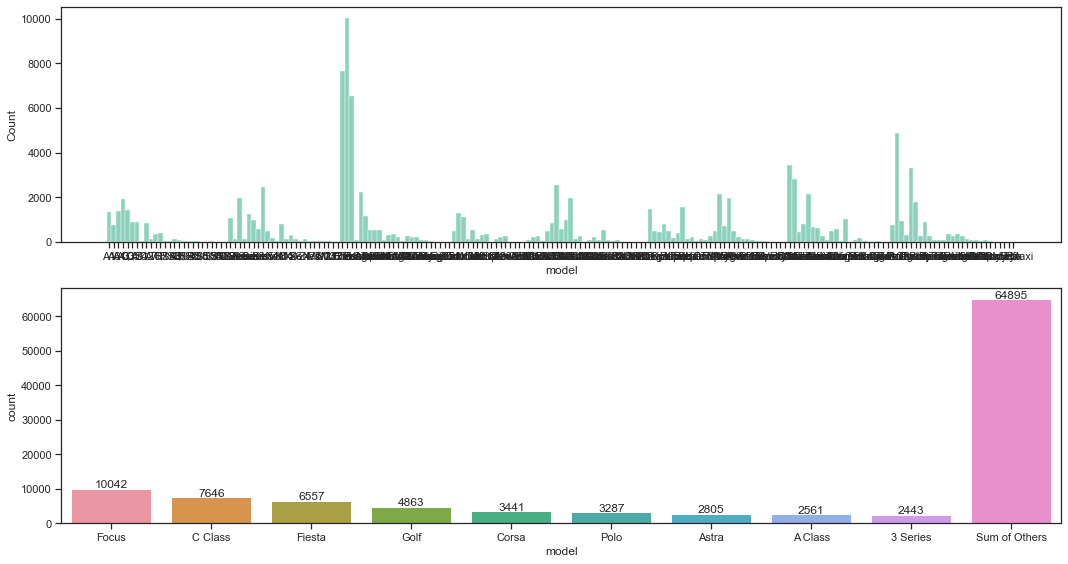

In [44]:
getVisualData('model')

1. `model` memiliki distribusi tidak normal 
2. Focus, C Class dan Fiesta merupakan 3 model yang paling banyak didataset 

### Year

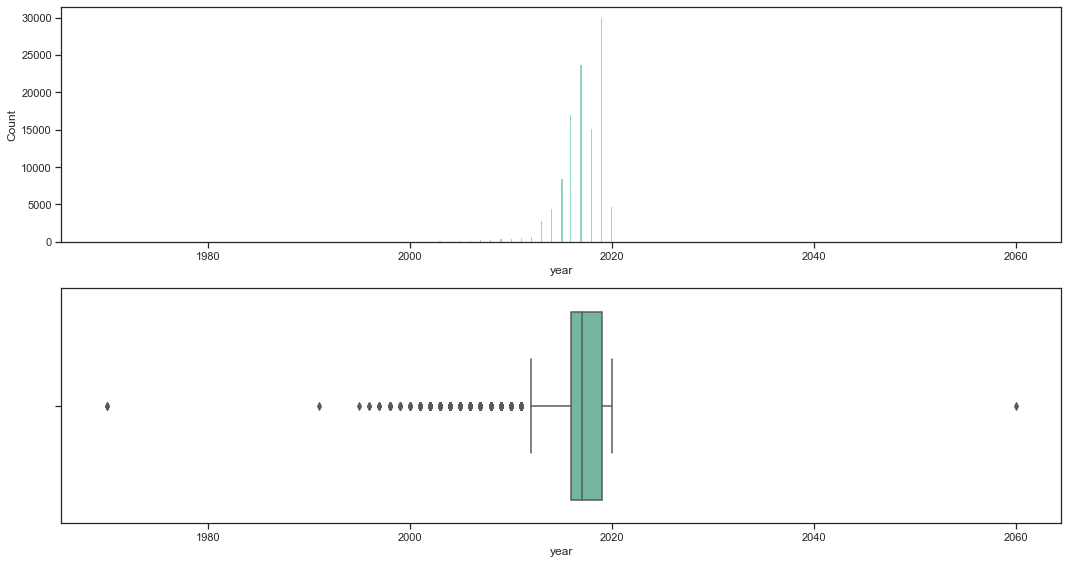

In [45]:
getVisualData('year')

1. `year` memiliki distribusi tidak normal 
2. 50% data berkumpul di tahun 2016-2019
3. Banyak outlier berada disebelah kiri, dan nilai terendah adalah tahun 1970, sedangkan nilai tertinggi adalah 2060 yang merupakan anomali data

### Price

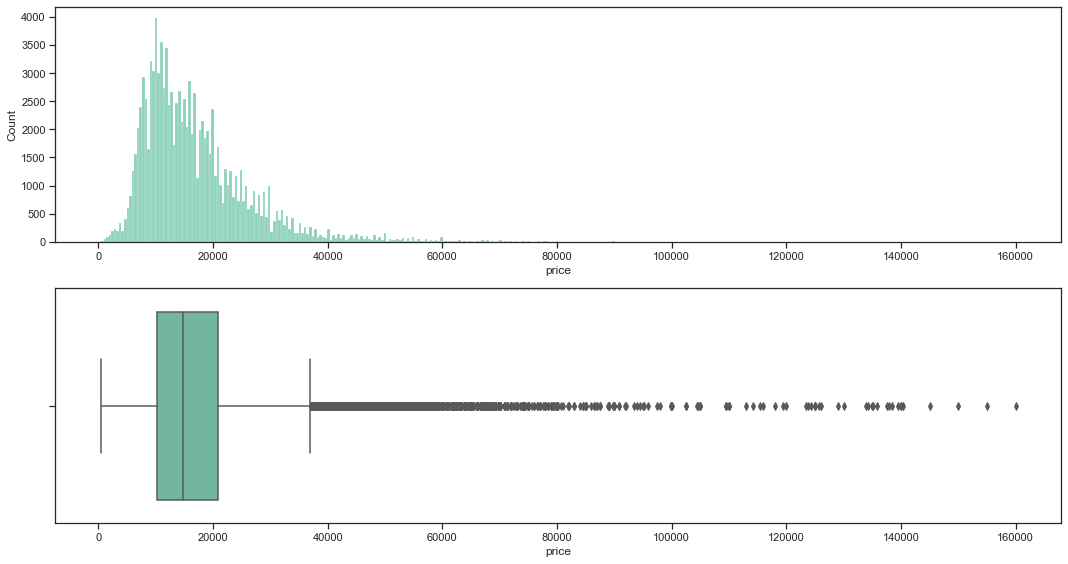

In [46]:
getVisualData('price')

1. `Price` memiliki distribusi data tidak normal
2. 50% data berada direntang harga 10229 - 20940
3. Ada banyak data outlier disebelah kanan data

### Transmission

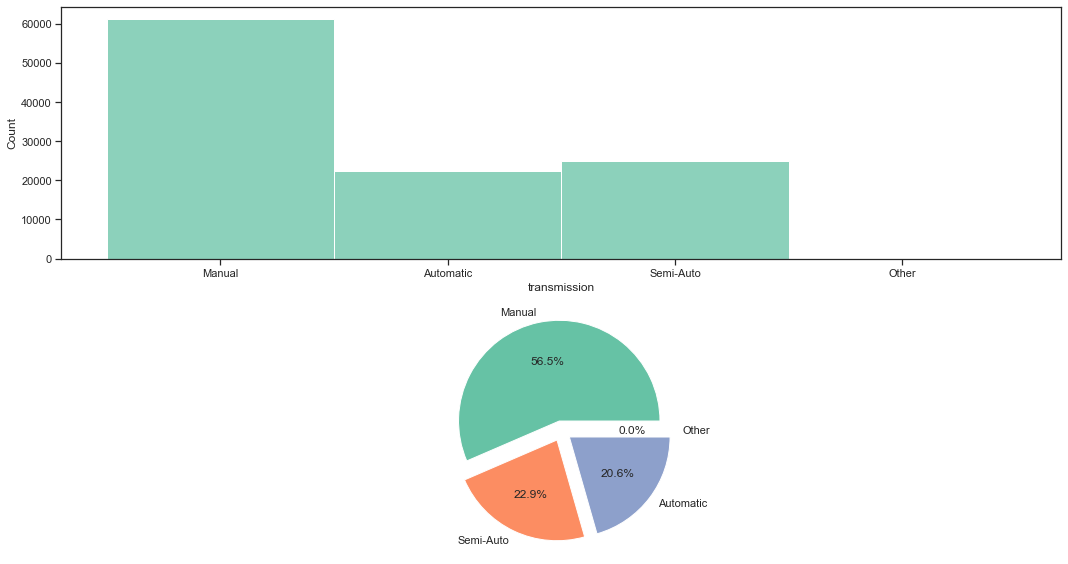

In [47]:
getVisualData('transmission')

1. `transmission` memiliki distribusi tidak normal
2. Manual merupakan transmission yang paling banyak didataset
3. Semi-Auto dan Automatic memiliki jumlah yang hampir sama di sekitara 20% data
4. Sedangkan other sangat sedikit tidak mencapai 0.5% data

### Mileage

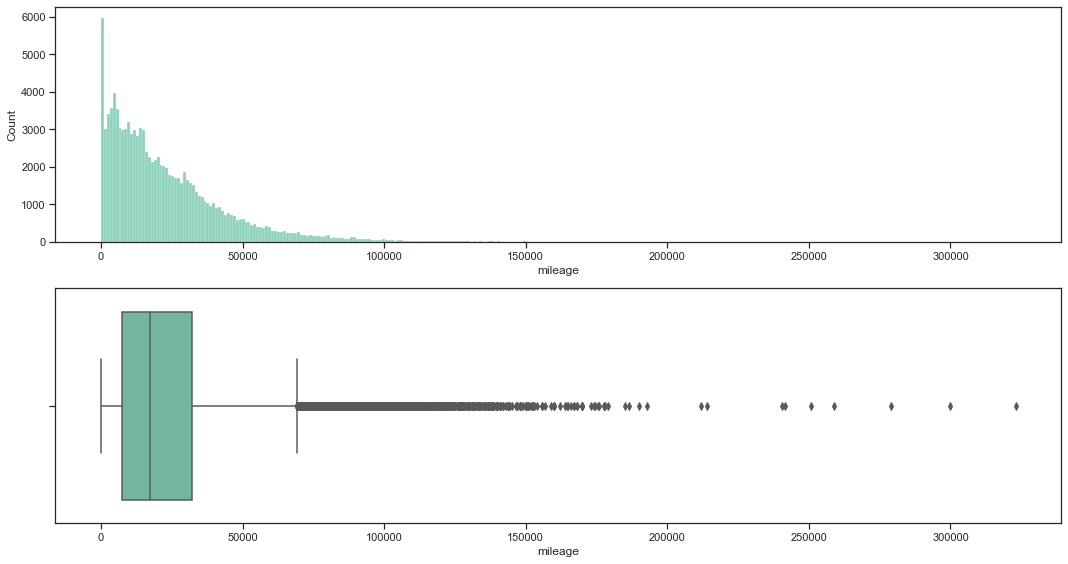

In [48]:
getVisualData('mileage')

1. `mileage` memiliki distribusi tidak normal
2. 50% data berkumpul di mileage 7,491 miles - 32,236 miles
3. Terdapat banyak outlier disebelah kanan

### Fuel Type

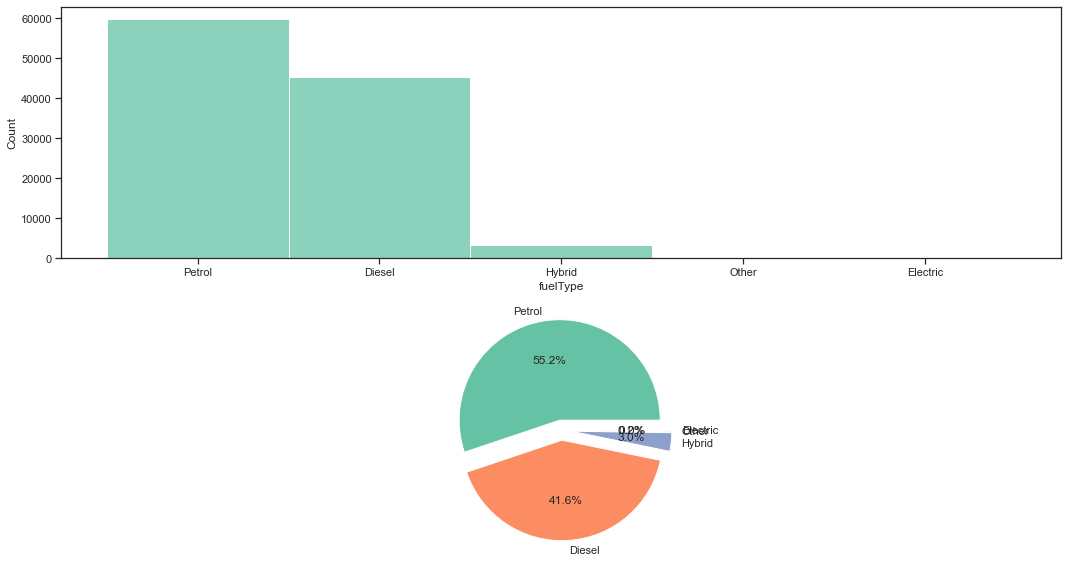

In [49]:
getVisualData('fuelType')

1. `fuelType` memiliki distribusi tidak normal
2. Petrol dan Diesel adalah jenis bahan bakar yang paling banyak didataset sejumlah 55.2% dan 41.6% dari keseluruhan data
3. hybrid hanya 3% dari data, electric & other tidak sampai 0.5 % dari data

### Tax

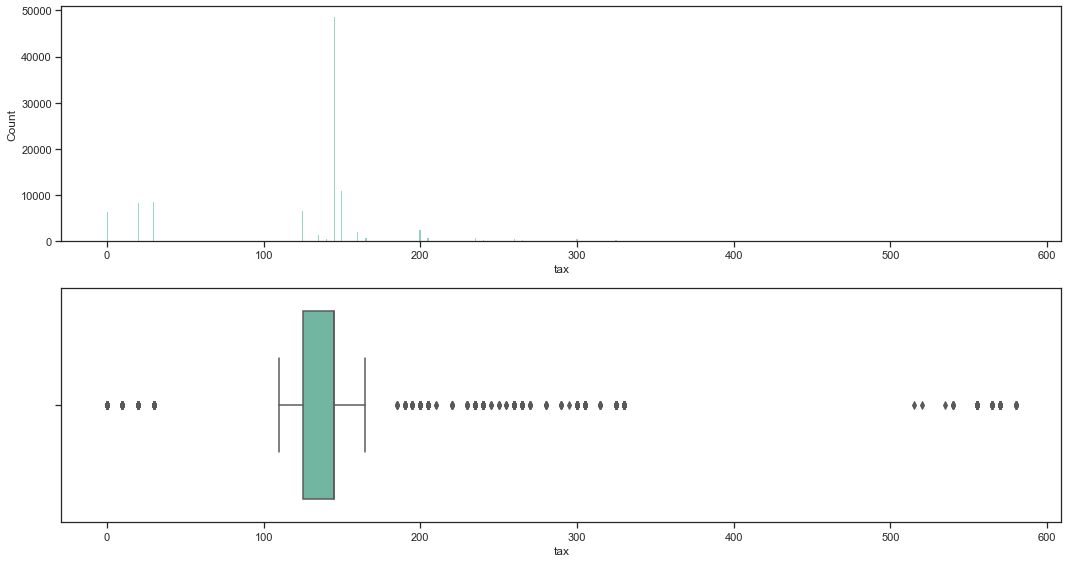

In [50]:
getVisualData('tax')

1. `tax` memiliki distribusi tidak normal
2. 50% data berkumpul di nilai 125 - 145
3. banyak data outlier berada di sebelah kanan
4. tax bernilai 0 bisa saja terjadi karena regulasi di UK mobil-mobil beremisi dibawah 100 memiliki nilai pajak 0

### MPG

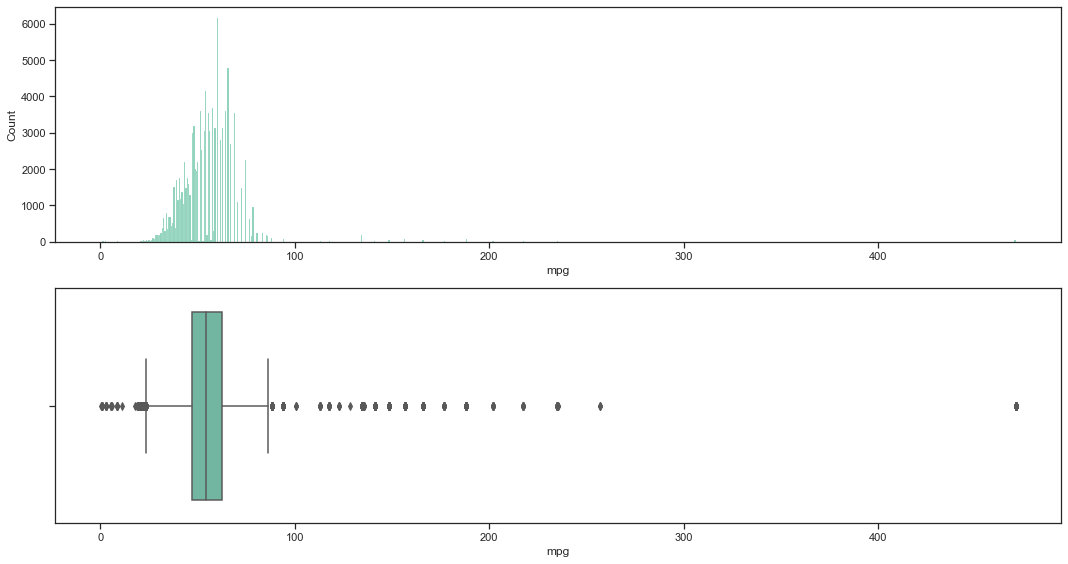

In [51]:
getVisualData('mpg')

1. `mpg` memiliki distribusi tidak normal
2. 50% data berkumpul di 47-62.8
3. Banyak data outlier berada di sebelah kanan data

### Engine Size

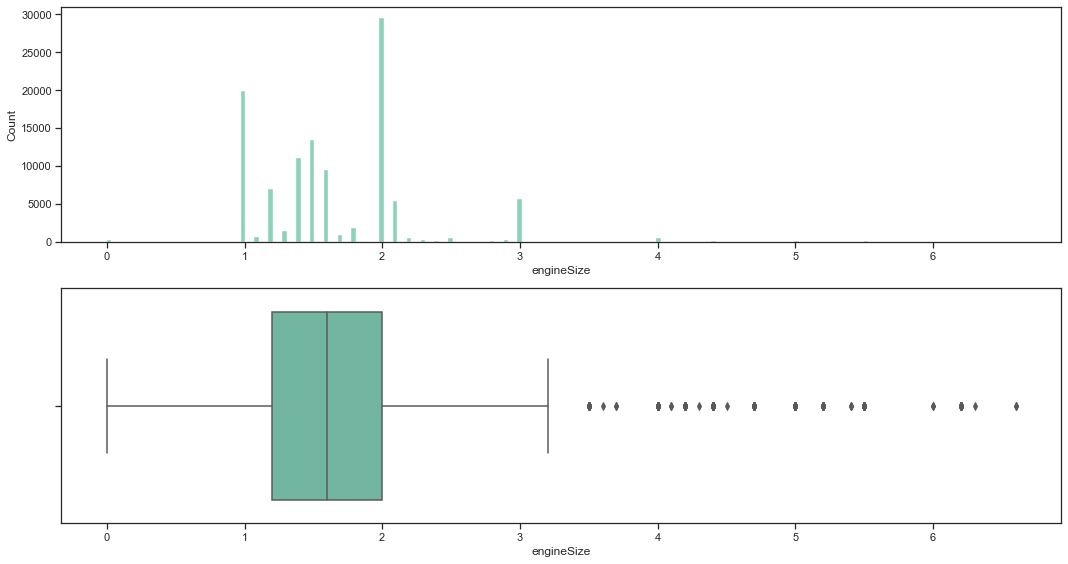

In [52]:
getVisualData('engineSize')

1. `engineSize` memiliki distribusi tidak normal
2. 50% data berkumpul di nilai 1.2 - 2
3. Terdapat nilai engineSize = 0, hal ini tidak mungkin karena setiap mesin mobil pasti memiliki ukuran kapasitas
4. Banyak data outlier berada disebelah kanan  data

### Brand

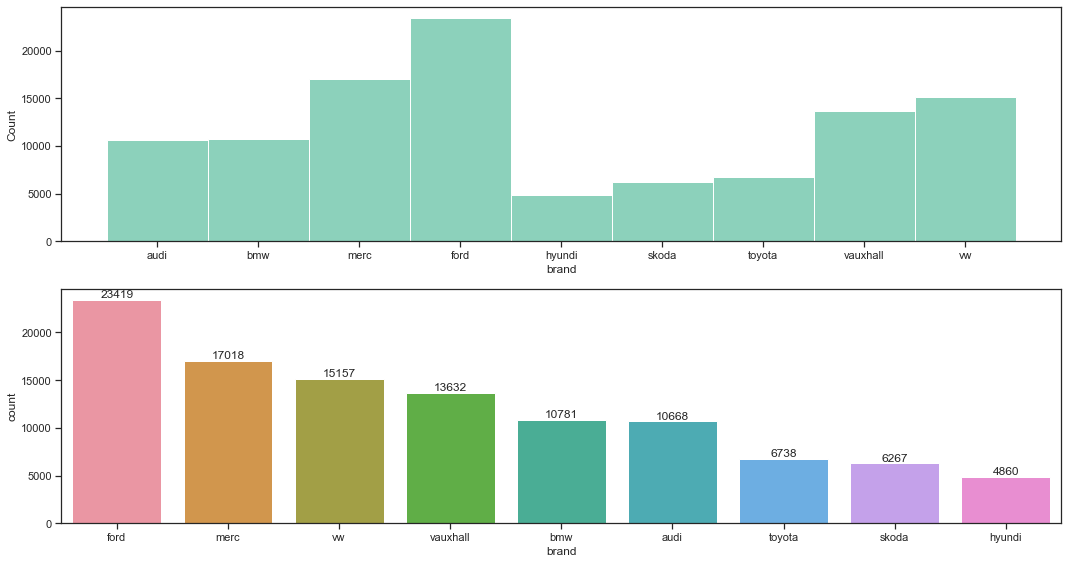

In [53]:
getVisualData('brand')

1. `brand` memiliki distribusi tidak normal
2. ford memiliki proporsi data terbanyak pada dataset ini

## Correlation
Karena semua feature memiliki distribusi data yang tidak normal, maka kita akan menghitung nilai korelasinya dengan method spearman

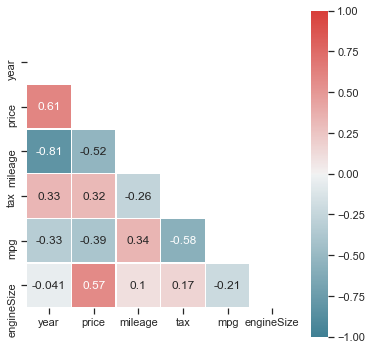

In [21]:

korelasi = df.corr(method='spearman')

plt.figure(figsize=(6,6))

# Generate a mask for the upper triangle
# np.triu = return segitiga bagian atas dari sebuah array
mask = np.triu(np.ones_like(korelasi, dtype=bool))

# Generate a custom diverging colormap between two HUSL colors
# as_cmap = If True, return a matplotlib.colors.Colormap
cmap = sns.diverging_palette(220, 13, as_cmap=True)

sns.heatmap(korelasi, # dataset
            annot=True,
            mask=mask, # If passed, data will not be shown in cells where mask is True. 
                        # Cells with missing values are automatically masked.
            cmap=cmap, # The mapping from data values to color space.
            center=0, # The value at which to center the colormap when plotting divergant data
            square=True, # true = create square shaped
            vmin=-1,
            vmax=1,
            linewidths=.5, # Width of the lines that will divide each cell
) 

plt.show()

1. Mileage & Year memiliki korelasi kuat tetapi berbanding terbalik, -0.81\
   Bisa dibilang semakin kecil ukuran mileage, semakin besar tahunnya (semakin muda umur mobil)
2. Mileage & Price memiliki korelasi moderate tetapi berbanding terbalik, -0.52\
   Bisa dibilang semakin besar nilai mileage maka semakin murah harga mobilnya tetapi hubungannya moderate
3. Year & Price memiliki korelasi moderate yang yang berbanding lurus, 0.61\
   Bisa dibilang semakin besar nilai year (semakin muda umur mobil) semakin tinggi harganya tetapi hubungannya moderate
4. Engine Size & Price memiliki korelasi moderate yang berbanding lurus, 0.57\
   Bisa dibilang semakin besar nilai engineSize (semakin boros) semakin tinggi harga mobilnya tetapi hubungannya moderate
5. MPG & Tax memiliki korelasi moderate yang berbanding terbalik, -0.58\
   Bisa dibilang semakin besar nilai mpg (semakin irit) semakin kecil nilai pajaknya tetapi hubungannya moderate

## Summary Statistic on Two Features

In [54]:
# global variable brands, agar dapat diakses disemua function
global brands
brands = df['brand'].unique()

# mendapatkan proporsi variable yang diminta berdasarkan brandnya
def getProportion(fv, k):
    result = df[df[k] == fv]['brand'].value_counts(ascending=True, sort=True)
    return list(map(lambda x: result[x] if x in result.index else 0, brands))

def getVisualBrand(k, title):
    if df[k].dtypes!=object: 
        # boxplot
        plt.figure(figsize=(10,8))
        sns.boxplot(data=df, y='brand', x=k)
        plt.title(title, size=15)
    else:
        # stacked barplot
        featureValues = df[k].unique()
        width = 0.35 # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots(figsize=(10,8))
        for i in range(len(featureValues)):
            if i == 0:
                proportion = getProportion(featureValues[i], k)
                
                # untuk kategori data yang berada dipaling bawah
                ax.bar(brands, proportion, width, label=featureValues[i])
            else:
                # simpan data proportion sebelumnya di variable lain karena masih akan digunakan 
                previousPropotion = proportion
                proportion = getProportion(featureValues[i], k)
                
                # parameter bottom diisi oleh data proportion sebelumnya
                ax.bar(brands, proportion, width, bottom=previousPropotion, label=featureValues[i])
        
        plt.title(title, size=15)
        ax.legend()
        
    plt.show()



### Year vs Brand

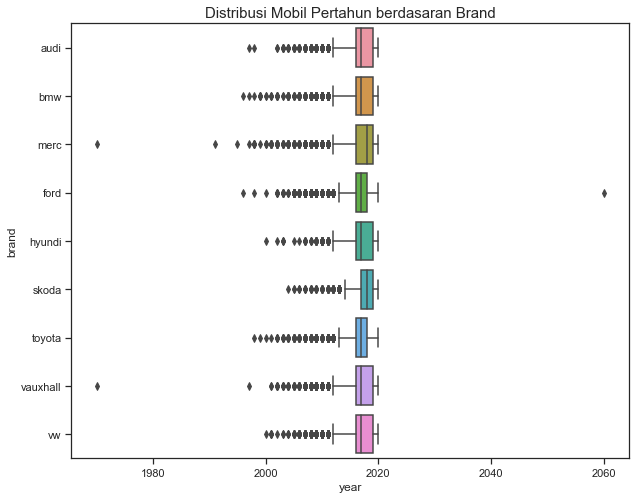

In [55]:
getVisualBrand('year', 'Distribusi Mobil Pertahun berdasaran Brand')

1. Rata-rata 50% data pada tiap brand mobil berada ditahun 2016-2019
2. Masing-masing merc & vauxhall memiliki 1 data mobil yang lebih tua dari 1980

### Price vs Brand

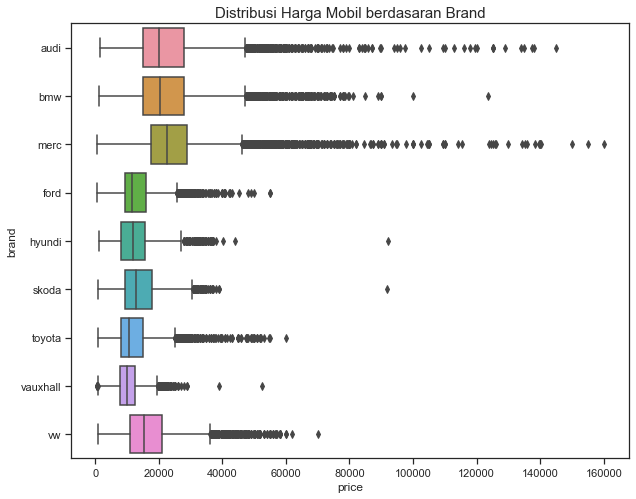

In [24]:
getVisualBrand('price', 'Distribusi Harga Mobil berdasaran Brand')

1. 50% data dari brand audi, bmw dan merc berada direntang harga sekitar 14950 - 28980 yang paling tinggi dibandingkan brand lainnya
2. Data outlier dari ketiga brand tersebut juga menunjukkan banyaknya mobil direntang harga sekitar 50000 - 160000, rentang harganya lebih besar dibandingkan brand lainnya, 
3. Dari kedua hal diatas bisa kita bilang bahwa brand audi, bmw dan merc memiliki rentang harga jual mobil yang lebih mahal dibanding brand lainnya (termasuk brand mobil mewah)

### Transmission vs Brand

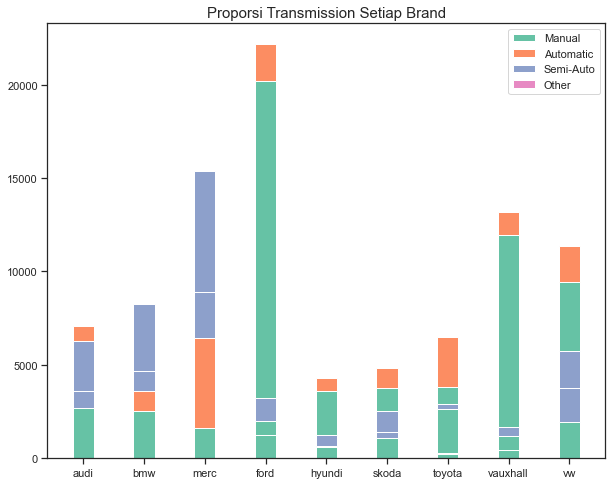

In [25]:
getVisualBrand('transmission', 'Proporsi Transmission Setiap Brand')

1. Pada mobil brand Audi, BMW & Merc (brand mobil mewah) lebih banyak menggunakan transmission semi-auto, sedangkan di brand lainnya proporsi transmission manual rata-rata lebih banyak dibanding proporsi transmisi lainnya
2. Ford memiliki proposi mobil dengan transmission manual terbanyak dibandingkan brand lainnya

### Mileage vs Brand

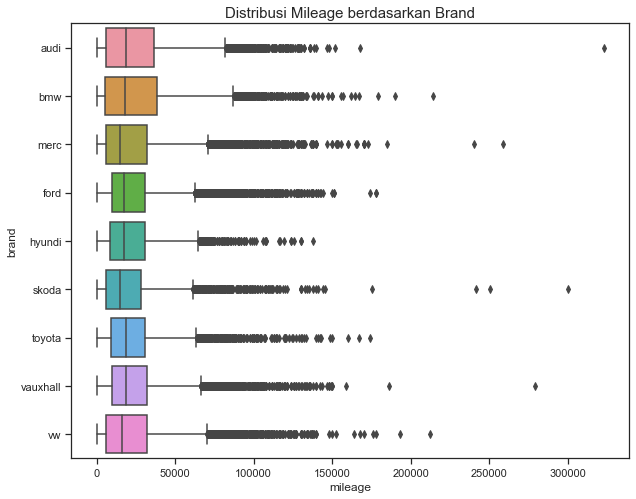

In [26]:
getVisualBrand('mileage', 'Distribusi Mileage berdasarkan Brand')

1. Rata-rata 50% data mileage berada di angka 7400-32000
2. Audi & Skoda memiliki mobil yang angka mieagenya diatas 300000

### Fuel Type vs Brand 

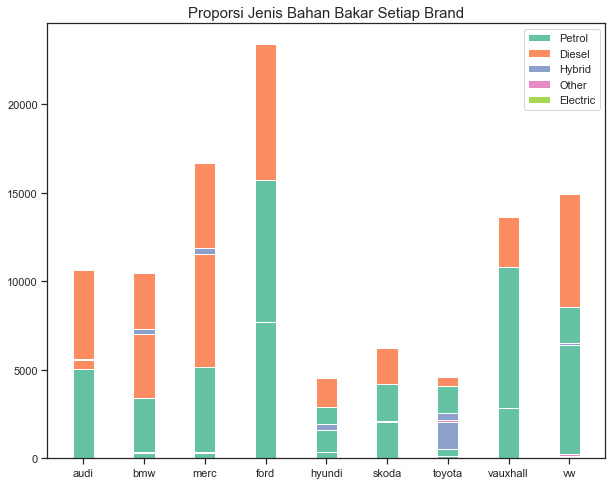

In [27]:
getVisualBrand('fuelType', 'Proporsi Jenis Bahan Bakar Setiap Brand')

1. Mobil dengan jenis bahan bakar petrol paling banyak berada di brand `ford`
2. Mobil dengan jenis bahan bakar diesel paling banyak berada di brand `merc`
3. Mobil dengan jenis bahan bakar hybrid paling banyak berada di brand `toyota`

### Tax vs Brand

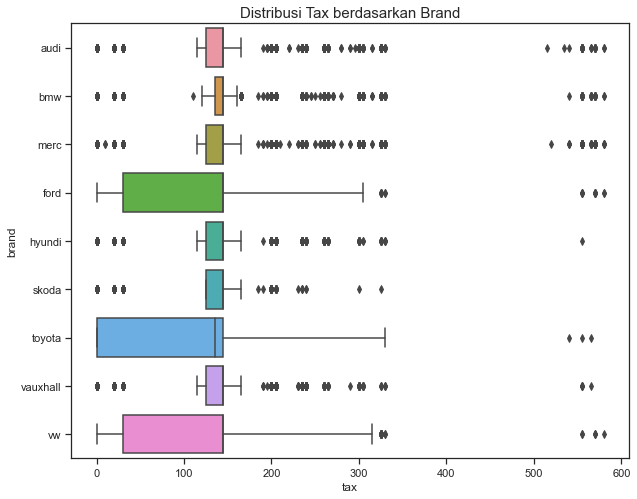

In [28]:
getVisualBrand('tax', 'Distribusi Tax berdasarkan Brand')

1. 50% data mobil toyota memiliki nilai rentang tax dari 0 - 145, nilai 0 ini sebagian besar berasal dari mobil berjenis bahan bakar Hybrid dan Petrol yang menghasilkan emisi kurang dari 100 sehingga pajaknya bisa 0
2. 50% data dari mobil ford dan vw memiliki nilai rentang tax yang lebar hampir sama seperti toyota tetapi masih lebih lebar dibanding brand lainnya yaitu dari 30-145
3. 50% data dari mobil-mobil selain dari tiga brand diatas, memiliki rentang tax yang lebih kecil tetapi berada dibagian batas atas (variant nilai pajak lebih tinggi) dari sekitar 125-145

### MPG vs Brand

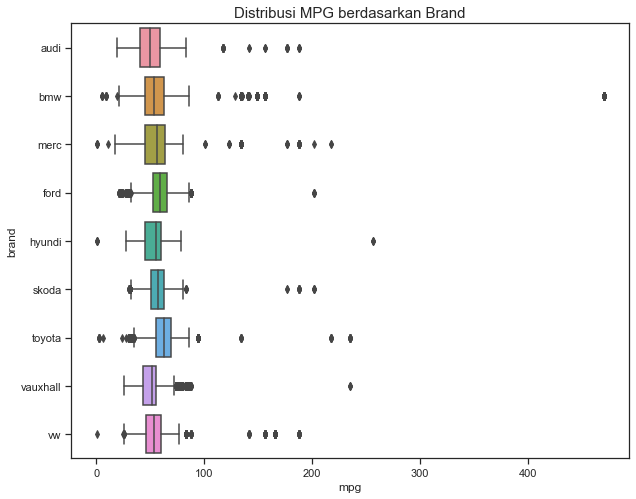

In [29]:
getVisualBrand('mpg', 'Distribusi MPG berdasarkan Brand')

1. 50% data nilai MPG semua brand rata-rata berada direntang 40 - 69
2. Ada satu data dari brand mobil BMW yang memiliki nilai MPG diatas 400

### Engine Size vs Brand

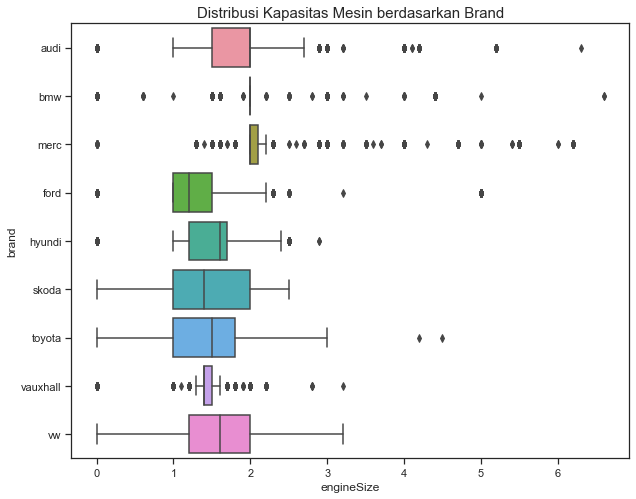

In [30]:
getVisualBrand('engineSize', 'Distribusi Kapasitas Mesin berdasarkan Brand')

1. Distribusi data untuk engine size disetiap brandnya terlihat sangat beragam
2. 50% data untuk mobil brand bmw berada di engine size = 2 sedangkan yang lainnya adalah outlier
3. 50% data untuk mobil brand skoda, toyota dan vw berada diantara engine size 1-2 dan tidak memiliki outlier kecuali toyota yang hanya memiliki 2 outlier

### Mileage vs Year

Berdasarkan hasil korelasi, mileage & year memiliki nilai korelasi yang tinggi dan berbanding terbalik yaitu dinilai -0.81

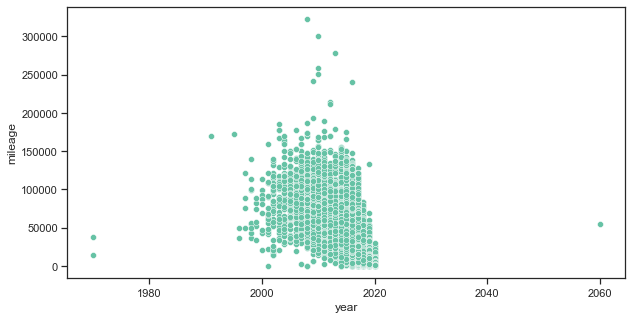

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="year", y="mileage")
plt.show()

1. Dari graphic scatter plot diatas, dapat terlihat semakin besar nilai tahunnya (semakin muda umur mobil), semakin kecil nilai mileagenya
2. Terdapat mobil dengan year 2060 yang merupakan anomali data
3. Dan terdapat mobil yang lebih tua dari tahun 1980 tetapi mileagenya juga tidak terlalu tinggi, kemungkinan ini adalah jenis mobil antik yang dijadikan koleksi sehingga angka mileagenya tidak terlalu tinggi.

## Summary Statistic on Three Features

### Year vs Tax vs Fuel Type

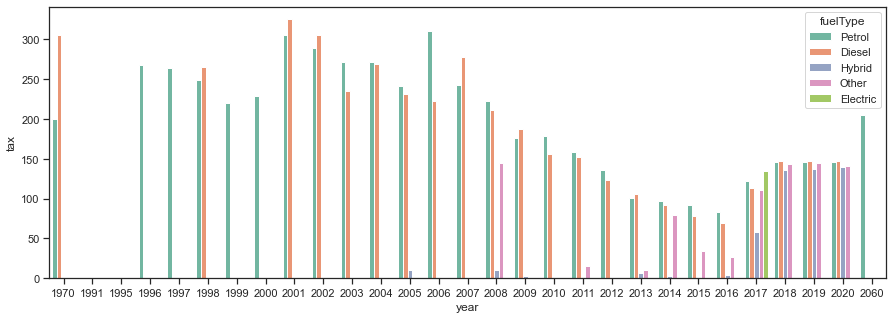

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='year', y='tax', hue='fuelType', ci=None)
plt.show()

1. Terlihat ada tren penurunan harga pajak dari tahun 2001- 2016
2. Pada tahun 2006, rata-rata nilai pajak mobil petrol lebih tinggi dibanding tahun lainnya
3. Mulai dari tahun 2017-2020 dapat dilihat rata-rata nilai pajak mobil dengan berbagai jenis bahan bakar kurang lebih sama, Dilansir dari https://www.gov.uk/government/news/new-vehicle-tax-rates-from-1-april-2017, (2017) per tanggal 1 April 2017 telah diberlakukan standarisasi nilai pajak di UK dimana mobil-mobil ditiap jenis fuelType akan memiliki kisaran nilai pajak yang saling tidak jauh berbeda.

### Year vs Price vs Brand

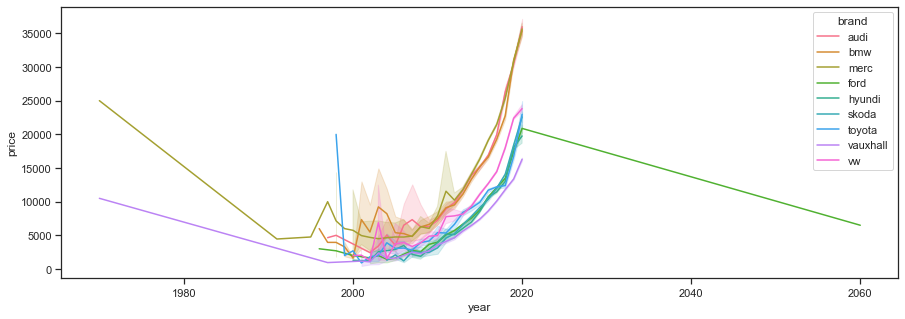

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='year', y='price', hue='brand')
plt.show()

1. Terlihat ada peningkatan harga mobil ketika umur mobil semakin muda
2. Brand Audi, BMW dan Merc memiliki rata-rata harga mobil yang lebih tinggi dibandingkan brand lainnya
3. Terdapat 2 mobil yang lebih tua dari tahun 1980 dari brand merc dan vauxhall dengan harga yang cukup tinggi, kemungkinan kedua mobil ini adalah mobil klasik yang memiliki nilai historik sebagai salah satu faktor tambahan dalam penentuan harga

### Tax vs MPG vs Fuel Type

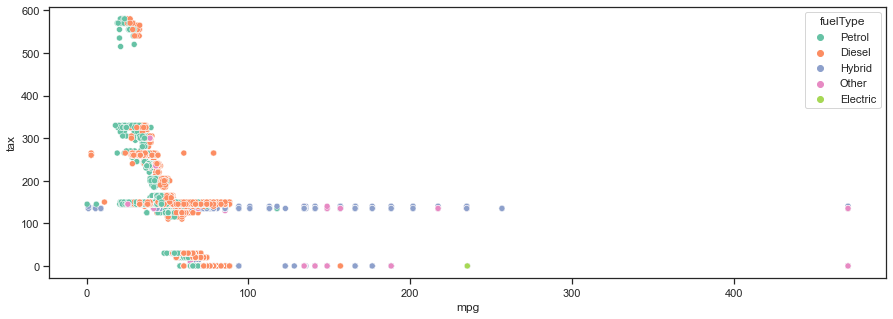

In [60]:
plt.figure(figsize=(15,5))
markers = ["." , "," , "o" , "v" , "^"]
sns.scatterplot(data=df, x='mpg', y='tax', hue='fuelType')
plt.show()

1. Mobil berjenis bahan bakar Hybrid rata-rata memiliki nilai tax yang relatif rendah berkisar dari 0 - 135
2. Banyak mobil-mobil berjenis bahan bakar hybrid yang memiliki nilai mpg tinggi tetapi nilai tax relatif rendah, ini dikarenakan kebijakan pemerintah UK yang menghitung nilai tax dari jumlah emisi yang dikeluarkan oleh mobil tersebut.

**save data df to be used on other file**

In [35]:
%store df

Stored 'df' (DataFrame)
